# ML-4. Кластеризация   
## Юнит 6. Основные алгоритмы машинного обучения. Часть II
### Skillfactory: DST-10
---

# Подготовка среды и датасетов

In [1]:
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [2]:
plt.rcParams['figure.figsize'] = 12, 8
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

In [3]:
# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам 
# не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

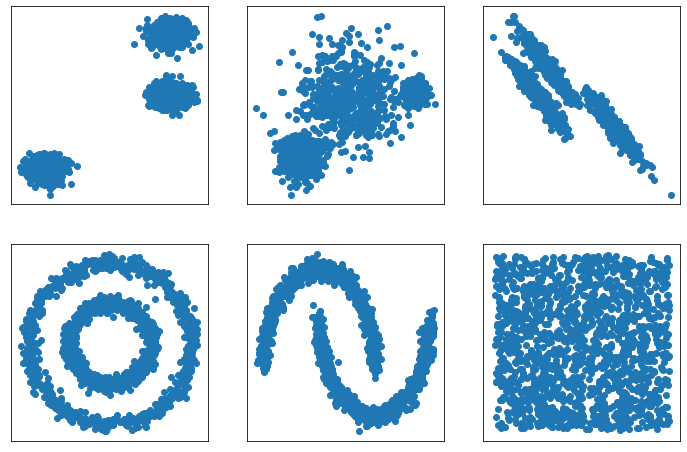

In [78]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1])

# K-means. Практика

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Интерактивная визуализация работы KMeans – https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Для примера из видео: **Random** $\rightarrow$ **Packed Circles**

![KMeans](https://www.jeremyjordan.me/content/images/2016/12/kmeans.gif "KMeans")

In [6]:
from sklearn.cluster import KMeans

# Создаем объект, который будет кластеризовать с использование k-means
k_means = KMeans(n_clusters=8, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300
                )

Рассмотрим, как будет работать алгоритм k-means на наших наборах данных.

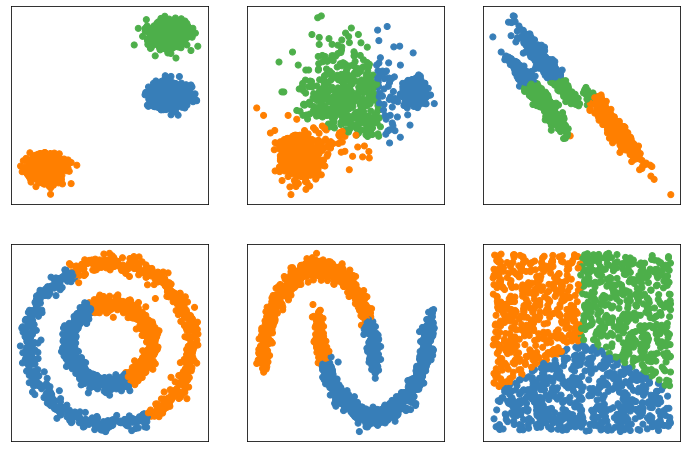

In [8]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма
# укажем для каждого набора данных только количество кластеров, остальные 
# параметры оставим по умолчанию
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X) # нормализуем набор данных 
    k_means = KMeans(n_clusters=k_means_params['n_clusters']) # создаем объект
        # k-means, который будет кластеризовать при указанном числе кластеров
    k_means.fit(X)  # обучаем алгоритм на наборе данных X
    y_pred = k_means.labels_.astype(np.int) # получаем предсказанные кластеры 
                                            # для всех объектов

    # Строим графики с результатами кластеризации
    plt.subplot(f'23{i}')           
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

Видим, что в самом простом случае все получилось, в данных, где был добавлен шум часть элементов перешла в другой кластер, на остальных примерах k-means отработал плохо: он либо перепутал кластеры, либо нашел кластеры там, где их не должно было быть.

### Задания для выполнения по алгоритму K-means
Для наших задач создадим датасет, в котором будет три кластера, а у каждого объекта будет два признака.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, 
                              center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, 
                             random_state=170, centers=[[-4, -3]], 
                             cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], 
                                                    np.array([2] * len(X_2))))

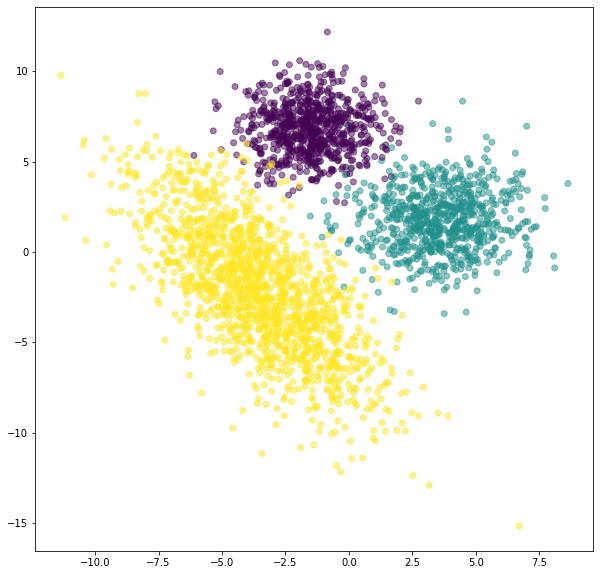

In [25]:
# Визуализируем наш датасет:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [26]:
# Посмотрим распределение классов в датасете:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

В дальнейшем в задачах с использованием этого датасета при использовании переменных X и y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.

Объект, который выполняет кластеризацию датасета с помощью алгоритма K-means, инициализруется так: k_means = KMeans()

In [27]:
from sklearn.cluster import KMeans

# Обучим модель K-means с параметрами n_clusters=3 и random_state=42 на 
# признаках исходного датасета.
k_means = KMeans(n_clusters=3, random_state=42)

При создании объекта можно указать следующие параметры:

* **n_clusters** — число кластеров, на которое алгоритм будет делить набор данных;

* **init** — способ начальной инициализации центроидов кластров;

* **random_state** — фиксирует генерацию случайного числа для инициализации центроидов.

Полный список параметров доступен в документации https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html (англ.).

### Задание 4.5.1
При каком значении параметра init при создании объекта K-means центроиды классов будут инициализированы случайным образом в пространстве объектов датасета?

In [95]:
print("При init='random' центроиды классов будут инициализированы случайным образом")

При init='random' центроиды классов будут инициализированы случайным образом


### Задание 4.5.2
Для обучения модели K-means необходимо вызвать метод fit, передав входным параметром признаки объектов датасета:

In [28]:
k_means.fit(X)

KMeans(n_clusters=3, random_state=42)

Обучив, мы можем получить центроиды кластеров:

In [29]:
cluster_centers = k_means.cluster_centers_
cluster_centers

array([[-3.18494242, -2.909118  ],
       [-2.38267054,  6.21386031],
       [ 3.65090178,  1.74134602]])

Какие центроиды будут у получившихся кластеров? Введите ответ в виде массива. Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round (astype(np.int) конвертирует элементы массива в целые числа.):

In [30]:
import numpy as np
print(np.round(cluster_centers).astype(np.int)) 

[[-3 -3]
 [-2  6]
 [ 4  2]]


In [33]:
print('[[-3 -3] [-2 6] [4 2]]')

[[-3 -3] [-2 6] [4 2]]


### Задание 4.5.3
Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите три числа через пробел(без запятых!): количество элементов в кластере 0, в кластере 1 и в кластере 2. Записывайте строго в таком порядке.

Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром return_counts=True:

In [37]:
import numpy as np

y_pred = k_means.labels_.astype(np.int)
_, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

1321 938 741 

Для визуализации получившегося датасета можно использовать следующий код:

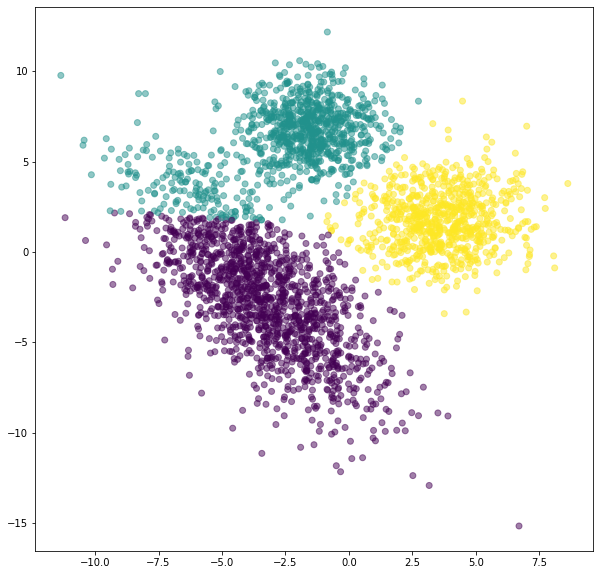

In [38]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

### Задание 4.5.4. КЛАСТЕРИЗАЦИЯ УЧЕНИКОВ СТАРШЕЙ ШКОЛЫ

В датасете для учеников предоставлены следующие признаки:

* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe Facebook (интересы, сообщества, встречи)

Мы будем пытаться выделить кластеры исключительно по интересам, поэтому в первую очередь удалите все признаки, кроме ключевых слов.

Нормализуйте оставшиеся признаки с помощью StandardScaler(). Помните, что кластеризация — обучение без учителя, поэтому разделение на обучающую и тренировочную выборку не требуется.

Используйте метод k-means для кластеризации, количество кластеров возьмите за 9, random_state =123.

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [43]:
df = pd.read_csv('./data/snsdata.csv')

In [44]:
df.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [45]:
df.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [46]:
X = df.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)

In [47]:
X.shape

(30000, 36)

In [48]:
# Нормализуем признаки с помощью StandardScaler()
X =  StandardScaler().fit_transform(X)

In [49]:
# Обучим модель K-means с параметрами n_clusters=9 и random_state=123 
k_means = KMeans(n_clusters=9, random_state=123)
k_means.fit(X)

KMeans(n_clusters=9, random_state=123)

Создадим массив меток объектов (в какой кластер попал каждый из объектов)

In [51]:
df['label'] = k_means.labels_

Определим номер кластера, в который попало меньше всего учеников.

In [55]:
# Способ 1
min_class = pd.Series(df['label']).value_counts().index[-1]
print(f'В {min_class} классе меньше всего учеников.') 

В 3 классе меньше всего учеников.


In [68]:
# Способ 2
print('Распределение количества студентов по кластерам:')
cl, counts = np.unique(df['label'], return_counts=True)
for i in range(len(counts)):
    print(f'Класс № {cl[i]}: {counts[i]}')

Распределение количества студентов по кластерам:
Класс № 0: 20345
Класс № 1: 424
Класс № 2: 830
Класс № 3: 1
Класс № 4: 1026
Класс № 5: 932
Класс № 6: 644
Класс № 7: 5034
Класс № 8: 764


In [72]:
# Способ 3
# Посмотрим распределение классов в датасете:
unique, counts = np.unique(df['label'], return_counts=True)
dict(zip(unique, counts))

{0: 20345, 1: 424, 2: 830, 3: 1, 4: 1026, 5: 932, 6: 644, 7: 5034, 8: 764}

В один из кластеров попали ученики с интересами music, god, dance, hair, shopping, cute, band, rock, football, church. Сколько всего учеников попали в этот кластер?

In [71]:
df[(df.music==1) & (df.god==1) & (df.dance==1) & (df.hair==1) & (df.shopping==1) & (df.cute==1) & (df.band==1) & (df.rock==1) & (df.football==1) & (df.church==1)]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,label


# EM-алгоритм. Практика

![EM-алгоритм](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif "EM-алгоритм")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

Наш алгоритм лежит в пакете GaussianMixture. При инициализации мы можем указать число компонентов, максимальное число итераций и способ инициализации начальных параметров.

In [73]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=1, 
                        max_iter=100,
                        init_params='kmeans' # 'kmeans’, ‘random’
                       )

Рассмотрим, как EM-алгоритм будет аботать с нашими наборами данных. Как и в случае с k-mean будем манипулировать только числом кластеров, остальные парамеры оставим без изменений.

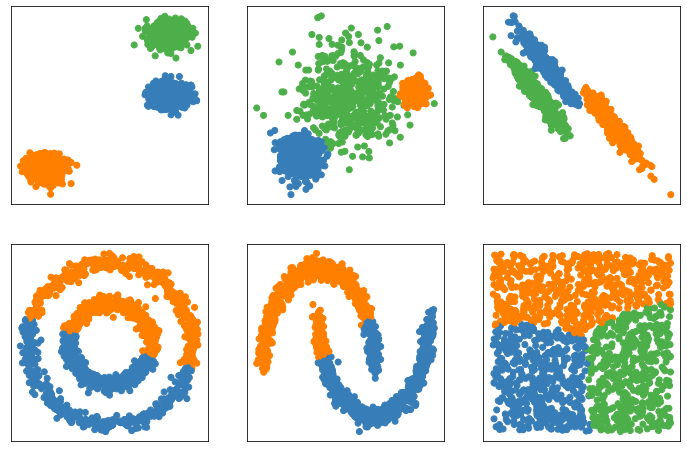

In [80]:
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, em_gm_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)  # нормализуем признаки
    em_gm = GaussianMixture(n_components=em_gm_params['n_clusters']) # создаем
                           # объект, который будет кластеризовать данные
    
    em_gm.fit(X)  # вызываем метод fit, который будет обучаться на наших данных  
    y_pred = em_gm.predict(X) # сохраим метки кластеров, которые нашел алгоритм
    
    # Визуализируем результаты     
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

Как и в случае с k-means, в в простейшем случае EM-алгоритм  разделил кластеры идеально, даже в данных, где был шум, EM-алгоритм справился; он также опеделил ленточную структуру. Однако в случае со сложными структурами EM-алгоритм запутался и определим кластеры в тех местах, где их не должно быть.

### Задания для выполнения по EM-алгоритму

Для решения задач используем датасет, который мы создавали в для K-means. 

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0,
                             7.5), cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, 
                             centers=[[-4, -3]], 
                             cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1],
                                                np.array([2] * len(X_2))))

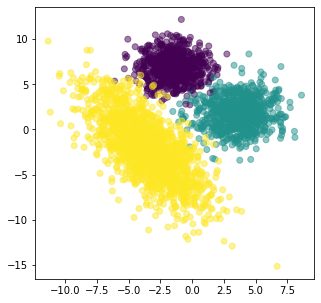

In [84]:
# Визуализируем наш датасет:
plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [85]:
# Посмотрим распределение классов в датасете:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

При использовании переменных X и y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.

Объект, который выполняет кластеризацию датасета с помощью EM-алгоритма с параметрами n_components=3 и random_state=42 , инициализируется так:

In [110]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)

В отличие от остальных рассматриваемых алгоритмов, EM-алгоритм лежит не в модуле cluster, а в модуле mixture. EM-алгоритм определяет смеси распределений в выборке, а не просто проводит кластеризацию.

Полный список параметров доступен в документации (англ.).

Для обучения модели GaussianMixture необходимо вызвать метод fit, передав входным параметром признаки объектов датасета. Получить предсказания можно с помощью метода predict после метода fit. 

In [111]:
gm.fit(X)
y_pred = gm.predict(X)

GaussianMixture(n_components=3, random_state=42)

Можно совместить эти два шага при помощи метода fit_predict:

In [112]:
y_pred = gm.fit_predict(X)

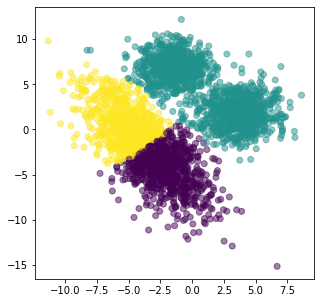

In [113]:
# Визуализируем наш датасет:
plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5)
plt.show()

Обучив, мы можем получить параметры распределений кластеров, например, средние:

In [114]:
means = gm.means_
means

array([[-2.21861264, -4.15574239],
       [ 1.01124148,  4.31664695],
       [-4.94579669,  0.04257022]])

### Задание 4.6.1. 

В алгоритме k-means за число кластеров отвечал параметр n_clusters. Какой параметр задаёт число кластеров в EM-алгоритме?

In [96]:
print("Число кластеров в EM-алгоритме задает параметр n_components")

Число кластеров в EM-алгоритме задает параметр n_components


### Задание 4.6.2. 

Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета.

Какие средние значения будут у получившихся распределений кластеров? Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round:

In [116]:
import numpy as np
print(np.round(means).astype(np.int)) # astype(np.int) конвертирует 
                                      # элементы массива в целые числа.

[[-2 -4]
 [ 1  4]
 [-5  0]]


In [117]:
print('[[-2 -4] [1 4] [-5 0]]')

[[-2 -4] [1 4] [-5 0]]


### Задание 4.6.3

Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2. Числа вводите целые, без точек и запятых.

Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром return_counts=True:

In [121]:
# Способ 1
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 788, 1: 1510, 2: 702}

In [123]:
# Способ 2
print('Распределение по кластерам:')
cl, counts = np.unique(y_pred, return_counts=True)
for i in range(len(counts)):
    print(f'Кластер № {cl[i]}: {counts[i]}')

Распределение по кластерам:
Кластер № 0: 788
Кластер № 1: 1510
Кластер № 2: 702


### Задание 4.6.4

Возьмите данные про учеников старшей школы из прошлого задания (c такой же обработкой) и примените к ним EM-алгоритм, количество кластеров — 9, random_state = 123. К какому кластеру принадлежит восьмой (по списку из изначального датасета) ученик? Введите номер кластера целым числом без точек и десятичной части.

In [125]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('./data/snsdata.csv')

X = df.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)

# Нормализуем признаки с помощью StandardScaler()
X =  StandardScaler().fit_transform(X)

# Обучим модель EM-алгоритм: количество кластеров — 9, random_state = 123 
gm = GaussianMixture(n_components=9, random_state=123)
gm.fit(X)

# Создадим массив меток объектов (в какой кластер попал каждый из объектов)
df['label'] = gm.fit_predict(X)

In [128]:
print(f'Всьмой по списку ученик принадлежит {df.iloc[7].label} кластеру')

Всьмой по списку ученик принадлежит 3 кластеру


Сколько итераций до схождения осуществил алгоритм? Вопрос относится к датасету об учениках старшей школы.

In [132]:
print(f'До схождения алгоритм осуществил {gm.n_iter_} итераций' )

До схождения алгоритм осуществил 30 итераций


# Агломеративная кластеризация. Практика

![AG](https://media.giphy.com/media/pSNCWCEAsgrAs/giphy.gif "Агломеративная кластеризация")

Посмотрим, как реализуется агломеративная кластеризация в пакете Sklearn. 

Для решения задач используем датасет, который мы создавали в для K-means и EM-алгоритма.

In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0,
                             7.5), cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, 
                             centers=[[-4, -3]], 
                             cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1],
                                                np.array([2] * len(X_2))))

Как и  K-means функция с агломертивной кластеризацией лежит в пакете sklearn.cluster.
При инициализации можно задать количество кастеров, функцию расстояния (по умолчание используется Евклидово), способ определения ближайшего соседа (по умолчанию linkage='ward', который минимизирует дисперсию объединяемых кластеров):

In [137]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                affinity='euclidean', # “euclidean”, “l1”, “l2”, “manhattan”, 
                                      # “cosine”, or “precomputed”
                linkage='ward', # “ward”, “complete”, “average”, “single”
                            )

Посмотрим, как агломеративная кластеризация будет работать с нашими наборами данных. Мы будем варьировать только число кластеров. Будем также использовать матрицу смежности, для которой нужен параметр n_neighbors, то есть число ближайших соседей.

Алгоритм строится аналогично предыдущим:  мы сначала нормализуем признаки объектов, **затем не обучаем** его, а строим матрицу смежности и делаем ее симметричной. Так мы получаем расстояние между объектами датасета. Далее создаём объект агломеративной кластеризации и передаём в него матрицу смежности. После этого обучаем алгоритм, игнорируем предупреждения и строим предсказания.

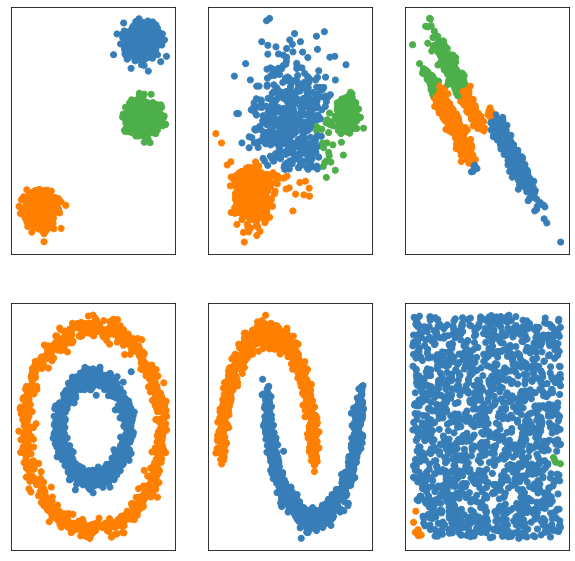

In [139]:
import warnings

from sklearn.neighbors import kneighbors_graph

datasets_params_list = [
    (blobs, {'n_clusters': 3, 'n_neighbors': 10}),
    (varied, {'n_clusters': 3, 'n_neighbors': 2}),
    (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
    (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
    (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
    (no_structure, {'n_clusters': 3, 'n_neighbors': 10})]

for i, (X, ac_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, 
                                    n_neighbors=ac_params['n_neighbors'], 
                                    include_self=False)
    # делаем матрицу смежности симметричной
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    # Создаём объект агломеративной кластеризации и
    # передаём в него матрицу смежности
    ac = AgglomerativeClustering(n_clusters=ac_params['n_clusters'], 
                                 linkage='average',
                                 connectivity=connectivity)
    
    # игнорируем предупреждения и обучаем
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        ac.fit(X) # обучаем
        
    # Строим предсказания
    y_pred = ac.labels_.astype(np.int)
    
    # Визуализируем наш датасет:
    plt.rcParams['figure.figsize'] = 10, 10
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

В результате агломеративная кластеризация справилась лучше, чем EM-алгоритм со сложными кластерами, с ленточными, наоборот, хуже, чем EM-алгоритм. При отсутствии кластерной структуры агломеративная кластеризация более явно определяет это, впрочем все равно есть маленькие участки двух кластеров, поскольку изначально мы определили, что кластеров будет 3.

### Задания для выполнения по алгоритму алгомеративной кластеризации

Для решения задач используем датасет, который мы создавали в для K-means и EM-алгоритма. 

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

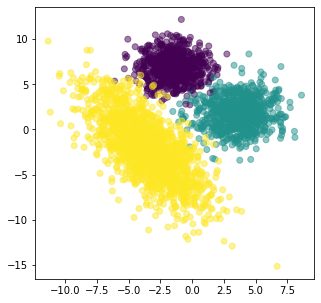

In [63]:
# Визуализируем наш датасет:
plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Инициализируем объект, который выполняет агломеративную кластеризацию датасета, с параметром n_clusters=3 (В отличие от k-means, AgglomerativeClustering не имеет параметра random_state.):

In [64]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)

Обучение модели AgglomerativeClustering проходит аналогично обучению модели k-means:

In [65]:
ac.fit(X)

AgglomerativeClustering(n_clusters=3)

Обучив, мы можем узнать, в какой кластер попал каждый из объектов:

In [66]:
# Получим метки кластеров у объектов датасета
y_pred = ac.labels_

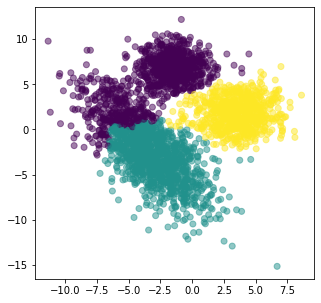

In [67]:
# Визуализируем результаты кластеризации
plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5)
plt.show()

### Задание 4.7.1

Обучите модель AgglomerativeClustering с параметром n_clusters=3 на признаках исходного датасета. Напишите число листьев в иерархическом дереве, полученном при обучении

In [68]:
print(f'Число листьев в дереве, полученном при обучении = {ac.n_leaves_}') 

Число листьев в дереве, полученном при обучении = 3000


### Задание 4.7.2
Подсчитайте количество элементов в каждом из получившихся кластеров. 

In [69]:
# Способ 1: можно воспользоваться функцией numpy.unique(return_counts=True):
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 1112, 1: 1142, 2: 746}

In [70]:
# Способ 2
print('Распределение по кластерам:')
cl, counts = np.unique(y_pred, return_counts=True)
for i in range(len(counts)):
    print(f'Кластер № {cl[i]}: {counts[i]}')

Распределение по кластерам:
Кластер № 0: 1112
Кластер № 1: 1142
Кластер № 2: 746


### Задание 4.7.3

При создании модели AgglomerativeClustering можно указать матрицу смежности, передав её в параметр connectivity. 
Построить матрицу смежности можно с помощью следующего кода:

In [71]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

В переменной connectivity будет хранится матрица смежности для ненаправленного графа на основе датасета. 

Обучите **модель AgglomerativeClustering** с параметром *n_clusters=3* и составленной матрицей смежности на признаках исходного датасета.

Посчитайте матрицу смежности, используя приведённый код. Подставьте получившееся значение в параметр connectivity при создании объекта *AgglomerativeClustering*. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2.

In [72]:
# Создаём объект агломеративной кластеризации и
# передаём в него матрицу смежности
ac = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)
    
ac.fit(X) # обучаем

# Строим предсказания
y_pred = ac.labels_.astype(np.int)

# Подсчитаем количество элементов в каждом из получившихся кластеров
unique, counts = np.unique(y_pred, return_counts=True)
dict(zip(unique, counts))

{0: 1486, 1: 746, 2: 768}

### Задание 4.7.4 - 4.7.5

Постройте дендрограмму с помощью пакета scipy (на выходе должно получиться изображение иерархического дерева). Сколько получится кластеров, если граничным расстоянием для разделения кластеров взять 150, 100.

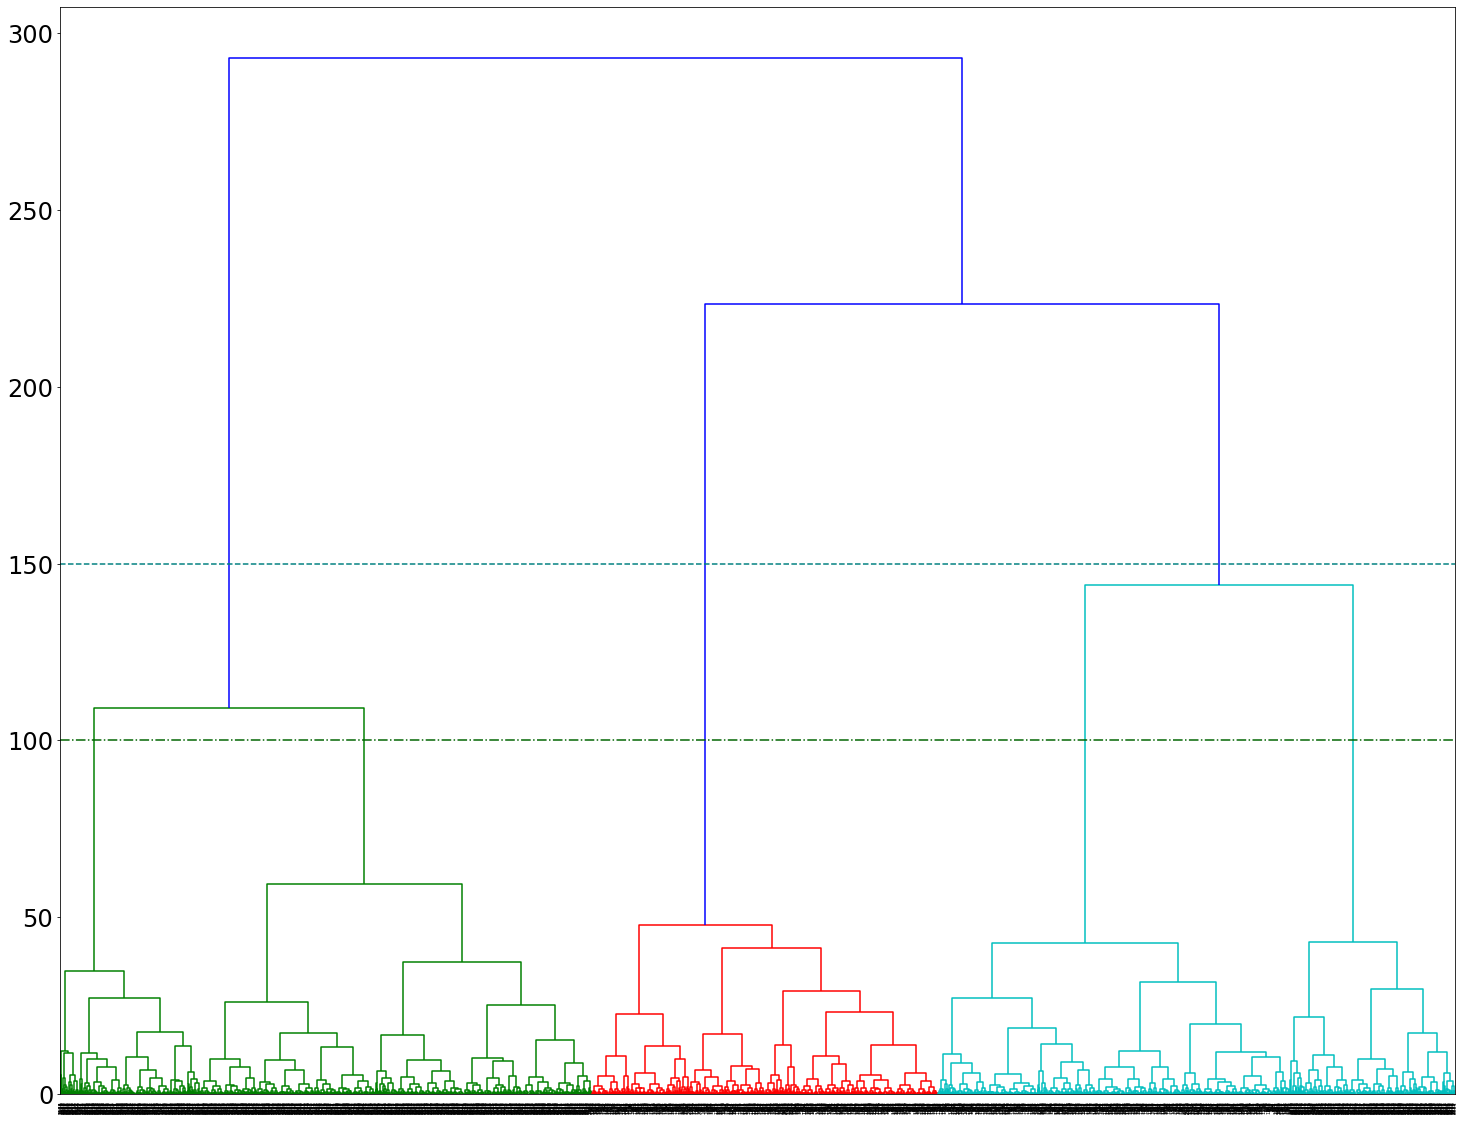

In [82]:
import matplotlib as mpl

mpl.rcParams.update({'font.size': 24})

from scipy.cluster.hierarchy import dendrogram, linkage
# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

fig = plt.figure(figsize=(25, 20))

plt.axhline(y=150, linestyle='--', color='teal')
plt.axhline(y=100, linestyle='-.', color='darkgreen')

# строим дендрограмму
dn = dendrogram(Z, leaf_rotation=90.)

plt.show()

### Задание 4.7.6

Рассмотрим данные, содержащие информацию о составе различных продуктов.

Попробуем построить на них иерархическую кластеризацию:

In [36]:
import pandas as pd
df = pd.read_csv('./data/food.txt', sep = ' ')

In [37]:
df.head(5)

,Name,Energy,Protein,Fat,Calcium,Iron
0,Braised beef,340,20,28,9,2.6
1,Hamburger,245,21,17,9,2.7
2,Roast beef,420,15,39,7,2.0
3,Beefsteak,375,19,32,9,2.6
4,Canned beef,180,22,10,17,3.7


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
Name       27 non-null object
Energy     27 non-null int64
Protein    27 non-null int64
Fat        27 non-null int64
Calcium    27 non-null int64
Iron       27 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.4+ KB


In [39]:
from sklearn.preprocessing import StandardScaler

X = df.drop(['Name'], axis=1)

# Нормализуем признаки с помощью StandardScaler()
X =  StandardScaler().fit_transform(X)

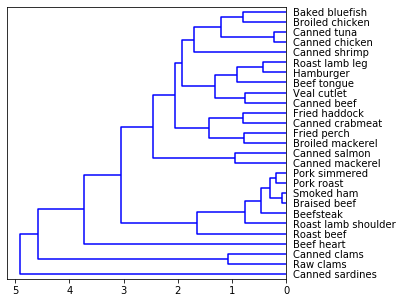

In [40]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='average', metric='euclidean')
names = df.Name.values
dend = dendrogram(Z, color_threshold=0, labels=names, orientation='left')

In [41]:
from scipy.cluster.hierarchy import fcluster

t = 2.3
labels = fcluster(Z, t, criterion='distance')

In [42]:
# Выставим продукту метку кластера
df['label'] = labels

In [44]:
print(f'При t={t} было получено {df.label.nunique()} кластеров')

При t=2.3 было получено 6 кластеров


In [45]:
# Отобразим количество элементов в каждом кластере
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{1: 2, 2: 7, 3: 2, 4: 14, 5: 1, 6: 1}

Определим номер кластера, в который попали продукты с содержанием кальция от 150 до 160.

In [48]:
df[(df.Calcium >= 150) & (df.Calcium <= 160)].label

21    3
23    3
Name: label, dtype: int32

In [55]:
number_max_fat = df.iloc[np.argmax(df.Fat.values)].label
print(f'Номер кластера с максимальной жирностью: {number_max_fat}')

Номер кластера с максимальной жирностью: 2


# DBSCAN. Практика

Интерактивная визуализация работы DBSCAN – https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

![DBSCAN](https://media0.giphy.com/media/lCL2GQewp7fkk/giphy.gif "DBSCAN")

Рассмотрим данные, подготовленные ранее (в п. Подготовка среды и датасетов)

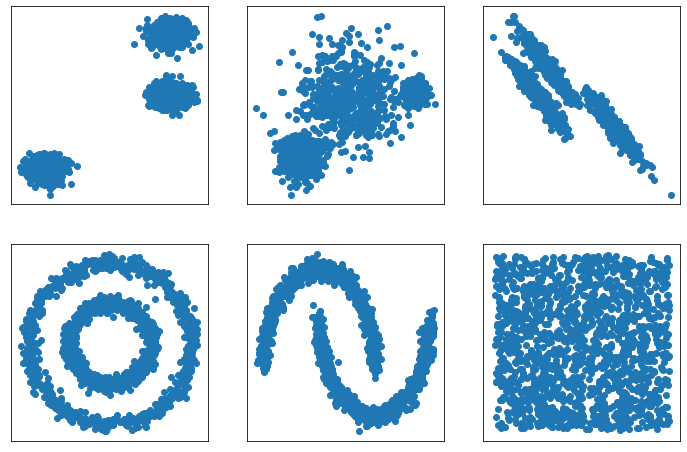

In [4]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1])

Посмотрим, как реализуется алгоритм DBSCAN в пакете Sklearn. Также как и k-means и алгомеративная кластеризация, DBSCAN лежит в пакете cluster. 
При инициализации можно задать размер окрестностей eps (размер окрестности, которую мы рассматриваем) и min_sample – минимальное число точек, которые должны лежать в этой окрестности, чтобы мы точку считали принадлежащей этому кластеру.

In [6]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,
                min_samples=5)

Посмотрим, как DBSCAN будет работать с рассмотренными ранее наборами данных. 
Будем манипулировать только параметром eps, остальные параметры DBSCAN оставим по умочанию. 

Для DBSCAN очень важно нормализовать признаки, поскольку очень точно нужно настроить параметр eps (порой до 3 знака) для лучшего результата

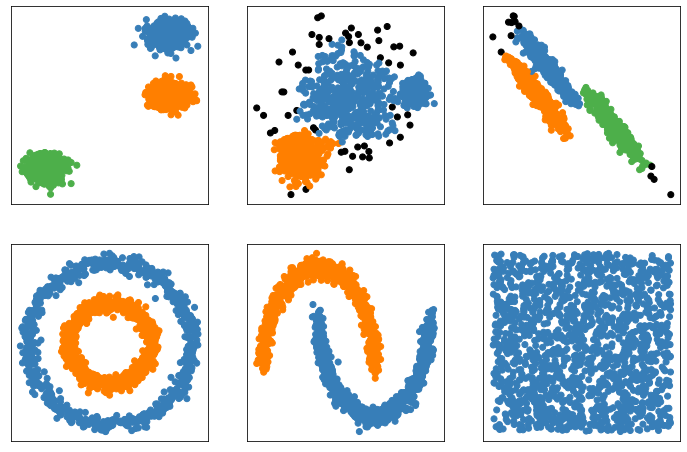

In [7]:
datasets_params_list = [
    (blobs, {'eps': 0.3}),
    (varied, {'eps': 0.18}),
    (aniso, {'eps': 0.184}),
    (noisy_circles, {'eps': 0.3}),
    (noisy_moons, {'eps': 0.3}),
    (no_structure, {'eps': 0.3})]

for i, (X, dbscan_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)  # нормализация
    dbscan = DBSCAN(eps=dbscan_params['eps']) # создаем объект DBSCAN, 
                                # который будет кластеризовать выборку
        
    dbscan.fit(X) # обучаем объект dbscan
    y_pred = dbscan.labels_.astype(np.int) # построим предсказания кластера
                                           # для каждого объекта

    # Визуализируем результаты кластеризации
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # чёрным цветом отметим выбросы, которые обнаружил dbscan
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

Как видно, DBSCAN отлично справился со случаем, когда данные были хорошо разделены, также он определил сложные случаи, в ленточной структуре он, правда, нашел несколько выбросов; DBSCAN оказался единственным алгоритмом, который правильно определил случай, где в данных не было кластерной структуры. Однако, если в данных был шум (второй случай), то это смущает DBSCAN и два кластера оказались склеены между собой, впрочем были найдены выбросы.

### Задания для выполнения по алгоритму DBSCAN
Для решения задач используем датасет, который мы создавали в для K-means, EM-алгоритма и алгомеративной кластеризации.


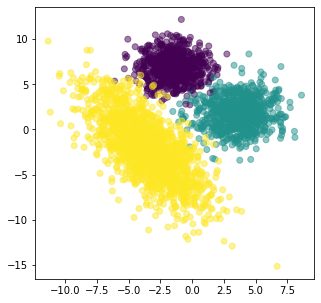

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

# Визуализируем наш датасет:
plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [11]:
# Посмотрим распределение классов в датасете:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

### Задание 4.8.1
Какой параметр DBSCAN устанавливает число объектов в окрестности, которое определяет, является ли объект основным или нет?

In [12]:
print(f"Параметр 'min_samples' устанавливает для DBSCAN число объектов в окрестности, которое определяет, является ли объект основным или нет")

Параметр 'min_samples' устанавливает для DBSCAN число объектов в окрестности, которое определяет, является ли объект основным или нет


### Задание 4.8.2

Обучите модель DBSCAN с параметрами eps=0.9 и min_samples=35 на признаках объектов исходного датасета. 

Обратите внимание, что DBSCAN определяет выбросы, относя их к кластеру -1. 

В отличие от k-means и AgglomerativeClustering, класс DBSCAN не имеет параметра n_clusters, поскольку DBSCAN автоматически определяет число кластеров в выборке.

In [15]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.9, min_samples=35) # Объект, который выполняет 
                        # кластеризацию датасета с помощью алгоритма DBSCAN

Обучение модели DBSCAN проходит аналогично обучению модели k-means:

In [16]:
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=35)

Обучив, мы можем узнать, в какой кластер попал каждый из объектов:

In [17]:
y_pred = dbscan.labels_

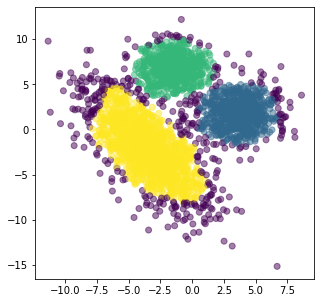

In [26]:
# Визуализируем результаты кластеризации
plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [24]:
# можно воспользоваться функцией numpy.unique(return_counts=True):
unique, counts = np.unique(y_pred, return_counts=True)
dict_clasters = dict(zip(unique, counts))
dict_clasters

{-1: 368, 0: 656, 1: 721, 2: 1255}

Определите число получившихся кластеров. Кластер выбросов учитывать в ответе не нужно.

In [27]:
count_claster = len(dict_clasters)-1
print(f'Число кластеров, без учета кластера выбросов: {count_claster}')

Число кластеров, без учета кластера выбросов: 3


### Задание 4.8.3
Сколько объектов выборки было отмечено как выбросы в прошлой задаче?

In [25]:
vibros = dict_clasters[-1]
print(f'DBSCAN обнаружил {vibros} выбросов')

DBSCAN обнаружил 368 выбросов


### Задание 4.8.4

Проверьте, как настройка параметров влияет на результат работы DBSCAN. Обучите модель DBSCAN с параметрами eps=0.8 и min_samples=35 на признаках объектов исходного датасета.

Выведите число объектов выборки, которые были отмечены как выбросы.

In [30]:
dbscan = DBSCAN(eps=0.8, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_

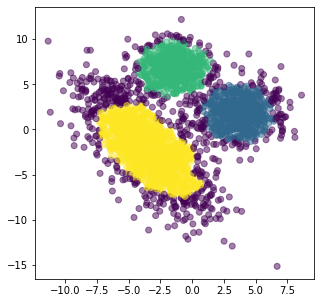

In [31]:
# Визуализируем результаты кластеризации
plt.rcParams['figure.figsize'] = 5, 5
plt.scatter(X[:, 0], X[:, 1], c=y_pred, alpha=0.5)
plt.show()

In [32]:
unique, counts = np.unique(y_pred, return_counts=True)
dict_clasters = dict(zip(unique, counts))
vibros = dict_clasters[-1]
print(f'DBSCAN обнаружил {vibros} выбросов')

DBSCAN обнаружил 583 выбросов


## Оценка коэффициента силуэта
### Задание 4.11.1
Обучите модель *GaussianMixture* с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте коэффициент силуэта для получившейся кластеризации. Ответ округлите до десятых и запишите с точкой.

При решении заданий модуля стандартизация должна быть выключена.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [2]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, random_state=42)

gm.fit(X)
# получим предсказанные кластеры при помощи метода кластеризации
y_pred_gm = gm.predict(X) 

In [3]:
from sklearn.metrics import silhouette_score

# теперь посчитаем коэффициент силуэта
sil_gm = silhouette_score(X=X, labels=y_pred_gm, metric='euclidean')
print(f'Коэффициент силуэта для модели GaussianMixture = {round(sil_gm, 1)} ')

Коэффициент силуэта для модели GaussianMixture = 0.4 


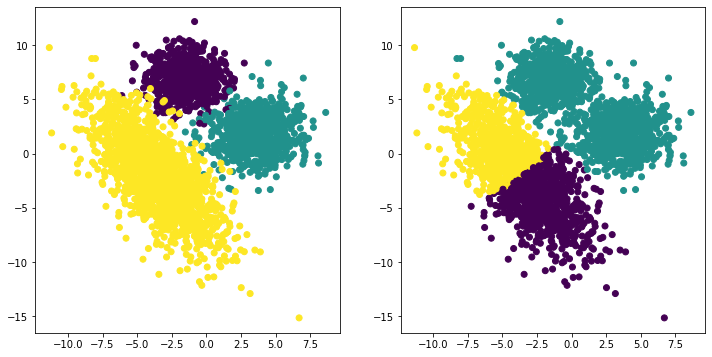

In [4]:
import matplotlib.pyplot as plt

# Визуализируем наш датасет и резултаты ЕМ-кластеризации:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].scatter(X[:, 0], X[:, 1], c=y)
axes[1].scatter(X[:, 0], X[:, 1], c=y_pred_gm)
plt.show()

### Задание 4.11.2
Сравните результаты кластеризации четырёх рассмотренных алгоритмов на исходном датасете при помощи коэффициента силуэта, инициализируйте алгоритмы со следующими параметрами:

* K-means — n_clusters=3, random_state=42

* EM-алгоритм (GaussianMixture) — n_components=3, random_state=42

* Агломеративная кластеризация – n_clusters=3

* DBSCAN – eps=0.9, min_samples=35

Укажите максимальное значение коэффициента силуэта, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

При решении заданий модуля стандартизация должна быть выключена.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

[0.5131660482634046, 0.3988405457243407, 0.4811992210663849, 0.4454335539277996]
Максимальное значение коэфф. силуэта 0.51


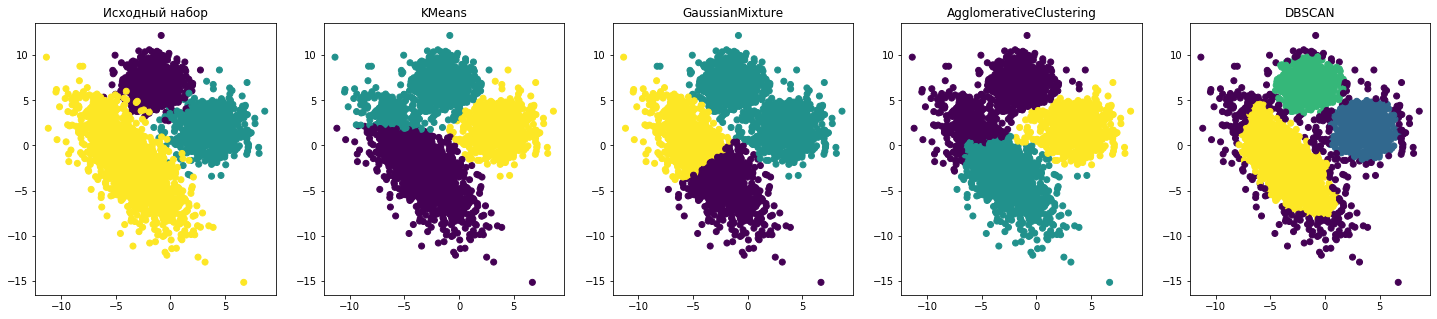

In [2]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

def compute_silhouette(classifiers, X):
    silhouette_list = [] 
    cur_axes = 0
    for clf in classifiers:
        clf.fit(X)
        if isinstance(clf, GaussianMixture):
            y_pred = clf.predict(X)
        else:
            y_pred = clf.labels_
        sil_clf= silhouette_score(X=X, labels=y_pred, metric='euclidean')
        silhouette_list.append(sil_clf)
        cur_axes += 1
        axes[cur_axes].scatter(X[:, 0], X[:, 1], c=y_pred)
        axes[cur_axes].set_title(str(clf.__class__.__name__))
    return silhouette_list

silhouettes = compute_silhouette([ 
    KMeans(n_clusters=3, random_state=42),
    GaussianMixture(n_components=3, random_state=42),
    AgglomerativeClustering(n_clusters=3),
    DBSCAN(eps=0.9, min_samples=35)], X)

print(silhouettes)
print(f'Максимальное значение коэфф. силуэта {round(max(silhouettes), 2)}')

# Визуализируем наш датасет и резултаты кластеризации:
axes[0].scatter(X[:, 0], X[:, 1], c=y)
axes[0].set_title('Исходный набор')
plt.show()

In [7]:
# Решение от Владимира Ляшенко
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

KM = KMeans(n_clusters=3, random_state=42)
gm = GaussianMixture(n_components=3, random_state=42)
ac = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.9, min_samples=35)

alg_dict = {'K-means': KM,
           'EM-алгоритм': gm, 
           'Агломеративная кластеризация': ac,
           'DBSCAN': dbscan}

for alg_names, alg in alg_dict.items():
    labels = alg.fit_predict(X)
    sil_score = silhouette_score(X=X, labels=labels)
    print(f'{alg_names}: {round(sil_score, 2)}')


K-means: 0.51
EM-алгоритм: 0.4
Агломеративная кластеризация: 0.48
DBSCAN: 0.45


### Задание 4.11.3

Подберите оптимальное количество кластеров с помощью коэффициента силуэта. Для этого найдите такое число кластеров, при котором значение коэффициента будет максимальным.

В трёх из рассмотренных нами алгоритмов необходимо задать число кластеров при инициализации: K-means, EM-алгоритм и агломеративная кластеризация.

Найдите значение коэффициента силуэта для данных алгоритмов при числе кластеров от 2 до 10 включительно. Для K-means и EM-алгоритма установите значение random_state=42.

В качестве ответа через пробел введите число кластеров, при котором значение коэффициента силуэта для результатов кластеризации было наибольшим для каждого из алгоритмов. Вводите в следующем порядке: K-means, EM-алгоритм, агломеративная кластеризация.

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

all_result = []

for count_cluster in range(2, 11):
    KM = KMeans(n_clusters=count_cluster, random_state=42)
    gm = GaussianMixture(n_components=count_cluster, random_state=42)
    ac = AgglomerativeClustering(n_clusters=count_cluster)

    alg_dict = {'K-means': KM, 'EM-алгоритм': gm, 
                'Агломеративная кластеризация': ac}
    sil_lst = []
    for alg_names, alg in alg_dict.items():
        labels = alg.fit_predict(X)
        sil_score = silhouette_score(X=X, labels=labels)
        sil_lst.append(round(sil_score, 3))
    
    print(f'{count_cluster}-кластера: {sil_lst}')
    all_result.append(sil_lst)

2-кластера: [0.455, 0.455, 0.406]
3-кластера: [0.513, 0.399, 0.481]
4-кластера: [0.511, 0.511, 0.485]
5-кластера: [0.482, 0.481, 0.473]
6-кластера: [0.46, 0.463, 0.436]
7-кластера: [0.398, 0.398, 0.361]
8-кластера: [0.334, 0.33, 0.347]
9-кластера: [0.328, 0.313, 0.278]
10-кластера: [0.322, 0.297, 0.281]


In [9]:
import pandas as pd

df = pd.DataFrame(all_result, columns=['KM','gm', 'ac'])
ans = []
ans.append(np.argmax(df.KM.values) + 2)
ans.append(np.argmax(df.gm.values) + 2)
ans.append(np.argmax(df.ac.values) + 2)
print(f'Число кластеров с макс.значением коэфф. силуэта для алгоритмов: {ans}')

Число кластеров с макс.значением коэфф. силуэта для алгоритмов: [3, 4, 4]


## Оценка однородности результатов кластеризации

При решении задания модуля стандартизация должна быть включена.

In [10]:
# Используем ранее рассматриваемый набор (еще раз код):
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [5]:
# Нормализуем пизнаки
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [5]:
# Получим предсказанные кластеры при помощи метода кластеризации KMeans
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X) 
kmeans_pred = kmeans.labels_

In [7]:
# теперь посчитаем однородность 
from sklearn.metrics.cluster import homogeneity_score
homogeneity_score(labels_true=y, labels_pred=kmeans_pred)

0.804474693112785

### Задание 4.12.1

Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи однородности, инициализируйте алгоритмы со следующими параметрами:

* k-means — n_clusters=3, random_state=42

* GaussianMixture — n_components=3, random_state=42

* AgglomerativeClustering — n_clusters=3

* DBSCAN — eps=0.9, min_samples=35

В качестве ответа укажите максимальное значение однородности, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.metrics.cluster import homogeneity_score

KM = KMeans(n_clusters=3, random_state=42)
gm = GaussianMixture(n_components=3, random_state=42)
ac = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.9, min_samples=35)

alg_dict = {'K-means': KM,
           'EM-алгоритм': gm, 
           'Агломеративная кластеризация': ac,
           'DBSCAN': dbscan}

for alg_names, alg in alg_dict.items():
    labels = alg.fit_predict(X)
    homogeneity = homogeneity_score(labels_true=y, labels_pred=labels)
    print(f'{alg_names}: {round(homogeneity, 2)}')


K-means: 0.8
EM-алгоритм: 0.93
Агломеративная кластеризация: 0.91
DBSCAN: 0.0


K-means: 0.8
EM-алгоритм: 0.93
Агломеративная кластеризация: 0.91
DBSCAN: 0.0


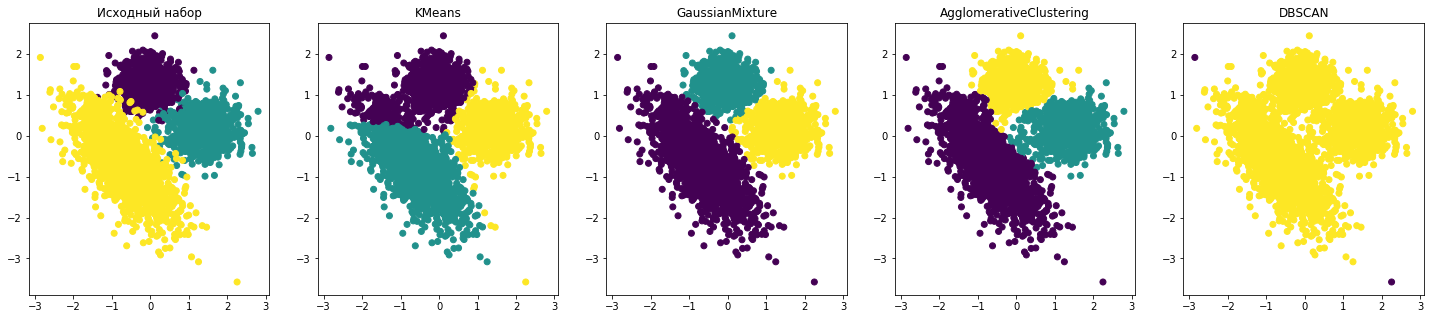

In [9]:
# то же, но с визуализацией
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.metrics.cluster import homogeneity_score

KM = KMeans(n_clusters=3, random_state=42)
gm = GaussianMixture(n_components=3, random_state=42)
ac = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.9, min_samples=35)

alg_dict = {'K-means': KM,
           'EM-алгоритм': gm, 
           'Агломеративная кластеризация': ac,
           'DBSCAN': dbscan}

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(25, 5))

cur_axes = 0
# Визуализируем наш датасет и резултаты кластеризации:
axes[0].scatter(X[:, 0], X[:, 1], c=y)
axes[0].set_title('Исходный набор')
   
for alg_names, alg in alg_dict.items():
    labels = alg.fit_predict(X)
    homogeneity = homogeneity_score(labels_true=y, labels_pred=labels)
    print(f'{alg_names}: {round(homogeneity, 2)}')
    cur_axes += 1
    axes[cur_axes].scatter(X[:, 0], X[:, 1], c=labels)
    axes[cur_axes].set_title(str(alg.__class__.__name__))
    
plt.show() 

## Полнота

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import completeness_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем полноту
completeness_score(labels_true=y, labels_pred=kmeans_pred)

0.7859676398774584

### Задание 4.13.1

Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте полноту для получившейся кластеризации.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [2]:
# Номализуем пизнаки
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [3]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import completeness_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
gm = GaussianMixture(n_components=3, random_state=42)
gm_pred = gm.fit_predict(X)

# теперь посчитаем полноту
round(completeness_score(labels_true=y, labels_pred=gm_pred),2)

0.93

### Задание 4.13.2

Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи полноты, инициализируйте алгоритмы со следующими параметрами:

* k-means — n_clusters=3, random_state=42

* GaussianMixture — n_components=3, random_state=42

* AgglomerativeClustering — n_clusters=3

* DBSCAN — eps=0.9, min_samples=35

В качестве ответа укажите максимальное значение полноты, полученное при помощи данных моделей.

*Подсказка*: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [5]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.metrics.cluster import completeness_score

KM = KMeans(n_clusters=3, random_state=42)
gm = GaussianMixture(n_components=3, random_state=42)
ac = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.9, min_samples=35)

alg_dict = {'K-means': KM,
           'EM-алгоритм': gm, 
           'Агломеративная кластеризация': ac,
           'DBSCAN': dbscan}

for alg_names, alg in alg_dict.items():
    labels = alg.fit_predict(X)
    completeness = completeness_score(labels_true=y, labels_pred=labels)
    print(f'{alg_names}: {round(completeness, 2)}')

K-means: 0.78
EM-алгоритм: 0.93
Агломеративная кластеризация: 0.91
DBSCAN: 0.08


## V-мера

*Подсказка*: При решении задания модуля стандартизация должна быть включена.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [7]:
# Номализуем пизнаки
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем v-меру
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

0.793500872513578

### Задание 4.14.1

Обучите модель GaussianMixture с параметрами n_components=3 и random_state=42 на признаках исходного датасета. Посчитайте v-меру для получившейся кластеризации.

Ответ округлите до сотых и запишите с точкой.

In [9]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import v_measure_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
gm = GaussianMixture(n_components=3, random_state=42)
gm_pred = gm.fit_predict(X)

# теперь посчитаем v-меру
round(v_measure_score(labels_true=y, labels_pred=gm_pred), 2)

0.93

### Задание 4.14.2

Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи v-меры, инициализируйте алгоритмы со следующими параметрами:

* k-means — n_clusters=3, random_state=42

* GaussianMixture — n_components=3, random_state=42

* AgglomerativeClustering — n_clusters=3

* DBSCAN — eps=0.9, min_samples=35

В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

In [11]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

from sklearn.metrics.cluster import v_measure_score

KM = KMeans(n_clusters=3, random_state=42)
gm = GaussianMixture(n_components=3, random_state=42)
ac = AgglomerativeClustering(n_clusters=3)
dbscan = DBSCAN(eps=0.9, min_samples=35)

alg_dict = {'K-means': KM,
           'EM-алгоритм': gm, 
           'Агломеративная кластеризация': ac,
           'DBSCAN': dbscan}

for alg_names, alg in alg_dict.items():
    labels = alg.fit_predict(X)
    v_measure = v_measure_score(labels_true=y, labels_pred=labels)
    print(f'{alg_names}: {round(v_measure, 2)}')

K-means: 0.79
EM-алгоритм: 0.93
Агломеративная кластеризация: 0.91
DBSCAN: 0.0


### Задание 4.14.3

Сравним модификации K-means с использованием случайной инициализации центроид и с использованием алгоритма K-means++ для инициализации центроид.

Для этого обучим на исходном датасете 2 модели k-means со следующими параметрами:

* n_clusters=3, init='k-means++', n_init=1, random_state=42

* n_clusters=3, init='random', n_init=1, random_state=42

В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score

KMP = KMeans(n_clusters=3, init='k-means++', n_init=1, random_state=42)
KMR = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)

alg_dict = {'K-means++': KMP, 'K-means': KMR}

for alg_names, alg in alg_dict.items():
    labels = alg.fit_predict(X)
    v_measure = v_measure_score(labels_true=y, labels_pred=labels)
    print(f'{alg_names}: {round(v_measure, 5)}')

K-means++: 0.78923
K-means: 0.78923


### Задание 4.14.4

Теперь сравним k-means с ещё одной модификацией — K-means mini batch. 

Воспользоваться реализацией K-means mini batch в библиотеке sklearn можно следующим образом: 
```python
from sklearn.cluster import MiniBatchKMeans

kmeans_mini_batch = MiniBatchKMeans(n_clusters=3, random_state=42)
kmeans_mini_batch.fit(X)
kmeans_mini_batch_pred = kmeans_mini_batch.labels_
```
Механизм кластеризации версии K-means mini batch схож с оригинальной версией алгоритма. Обучите на исходном датасете две модели:

* k-means с параметрами n_clusters=3, n_init=1, random_state=42

* MiniBatchKMeans с параметрами n_clusters=3, n_init=1, random_state=42

В качестве ответа введите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до сотых и запишите с точкой.

In [18]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans

from sklearn.metrics.cluster import v_measure_score

KMB = MiniBatchKMeans(n_clusters=3, random_state=42)
KM = KMeans(n_clusters=3, n_init=1, random_state=42)

alg_dict = {'K-means-batch': KMB, 'K-means': KM}

for alg_names, alg in alg_dict.items():
    labels = alg.fit_predict(X)
    v_measure = v_measure_score(labels_true=y, labels_pred=labels)
    print(f'{alg_names}: {round(v_measure, 2)}')

K-means-batch: 0.76
K-means: 0.79


### Задание 4.14.5

Рассмотрим агломеративную кластеризацию. Сравним, как влияет на качество кластеризации разный тип расстояния между кластерами.

Обучите на исходном датасете четыре модели AgglomerativeClustering с параметром n_clusters=3, меняя параметр linkage.

В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до сотых и запишите с точкой.

In [23]:
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics.cluster import v_measure_score

linkage_list = ['ward', 'complete', 'average', 'single']

list_V = []

print(f"Значение V-меры для алгоритмов:")
for linkage in linkage_list:
    ac = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    labels = ac.fit_predict(X)
    v_measure = v_measure_score(labels_true=y, labels_pred=labels)
    list_V.append(v_measure)
    print(f'  {linkage}: {round(v_measure, 4)}')
print(f"Максимальное значение V-меры:", round(max(list_V), 2))

Значение V-меры для алгоритмов:
  ward: 0.9079
  complete: 0.5806
  average: 0.6787
  single: 0.0009
Максимальное значение V-меры: 0.91


### Задание 4.14.6

Сравним, как влияет предварительный расчёт матрицы смежности на качество агломеративной кластеризации.

Обучите на исходном датасете две модели AgglomerativeClustering:

* с параметром n_clusters=3

* с параметром n_clusters=3 и предварительно посчитанной матрицей смежности для объектов датасета

Построить матрицу смежности можно с помощью кода:
```python
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)
```
В качестве ответа введите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до сотых и запишите с точкой.

In [25]:
from sklearn.neighbors import kneighbors_graph

# Строим матрицу смежности и делаем ее симметричной
connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [27]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import v_measure_score

ac = AgglomerativeClustering(n_clusters=3)
acc = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)

alg_dict = {'AC': ac, 'AC_CM': acc}

for alg_names, alg in alg_dict.items():
    labels = alg.fit_predict(X)
    v_measure = v_measure_score(labels_true=y, labels_pred=labels)
    print(f'  {alg_names}: {round(v_measure, 2)}')

  AC: 0.91
  AC_CM: 0.88


### Задание 4.14.7

Алгоритм DBSCAN очень требователен к параметрам: небольшое изменение в параметре eps или max_samples может изменить результат и качество кластеризации.

Обучите на исходном датасете две модели DBSCAN:

* с параметрами eps=0.9, min_samples=35

* с параметрами eps=0.8, min_samples=35

В качестве ответа укажите максимальное значение v-меры, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до сотых и запишите с точкой.

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

In [30]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import v_measure_score

dbscan_09 = DBSCAN(eps=0.9, min_samples=35)
dbscan_08 = DBSCAN(eps=0.9, min_samples=35)

alg_dict = {'DBSCAN_9': dbscan_09, 'DBSCAN_8': dbscan_08}

list_V = []
print(f"Значение V-меры для алгоритмов:")
for alg_names, alg in alg_dict.items():
    labels = alg.fit_predict(X)
    v_measure = v_measure_score(labels_true=y, labels_pred=labels)
    list_V.append(v_measure)
    print(f'  {alg_names}: {round(v_measure, 4)}')
print(f"Максимальное значение V-меры:", round(max(list_V), 2))

Значение V-меры для алгоритмов:
  DBSCAN_9: 0.7733
  DBSCAN_8: 0.7733
Максимальное значение V-меры: 0.77


### Задание 4.14.8

Особенностью алгоритма DBSCAN является то, что помимо кластеризации этот алгоритм определяет выбросы в выборке. Посмотрим на качество кластеризации без учёта таких объектов.

Обучите на исходном датасете модель DBSCAN с параметрами eps=0.9, min_samples=35. Посчитайте значение v-меры только для основных и граничных объектов выборки, то есть для объектов, что не являются выбросами. Ответ округлите до сотых и запишите с точкой.

In [33]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.cluster import v_measure_score

dbscan = DBSCAN(eps=0.9, min_samples=35)
labels = dbscan.fit_predict(X)
v_measure = v_measure_score(labels_true=y[labels != -1], 
                            labels_pred=labels[labels != -1])
print(f'V-мера для алгоритма без выбросов:={round(v_measure, 2)}')

V-мера для алгоритма без выбросов:=0.97


### Задание 4.14.9

Проверим, влияет ли предобработка данных на результат кластеризации. 
В курсе мы рассмотрели две метода нормализации данных:

* MinMax нормализация — приведение данных к масштабу между 0  и 1.

* Стандартная нормализация — данные имеют среднее 0  и стандартное отклонение 1.

Обучите две модели AgglomerativeClustering с параметрами n_clusters=3:
* на признаках исходного датасета,

* предварительно трансформируйте признаки при помощи стандартной нормализации.

Посчитайте v-меру для получившихся результатов, в качестве ответа введите наибольшее значение. Ответ округлите до сотых и запишите с точкой.


In [35]:
# Нормализуем пизнаки
from sklearn.preprocessing import StandardScaler
X_stand = StandardScaler().fit_transform(X)

In [43]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import v_measure_score

ac = AgglomerativeClustering(n_clusters=3)

data_dict = {'X': X, 'X_stand': X_stand}
print(f"Значение V-меры для наборов:")
for names, data in data_dict.items():
    labels = ac.fit_predict(data)
    v_measure = v_measure_score(labels_true=y, labels_pred=labels)
    print(f'  {names}: {round(v_measure, 4)}')

Значение V-меры для наборов:
  X: 0.7037
  X_stand: 0.9079


### Задание 4.14.10

Обучите две модели AgglomerativeClustering с параметрами n_clusters=3:

* на признаках исходного датасета,

* предварительно трансформируйте признаки при помощи MinMax нормализации.

Посчитайте v-меру для получившихся результатов, в качестве ответа введите наибольшее значение. Ответ округлите до сотых и запишите с точкой.

In [44]:
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit_transform(X)

In [46]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import v_measure_score

ac = AgglomerativeClustering(n_clusters=3)

data_dict = {'X': X, 'X_minmax': X_minmax}
print(f"Значение V-меры для наборов:")
for name, data in data_dict.items():
    labels = ac.fit_predict(data)
    v_measure = v_measure_score(labels_true=y, labels_pred=labels)
    print(f' {name}: {round(v_measure, 4)}')

Значение V-меры для наборов:
 X: 0.7037
 X_minmax: 0.8929
